In [ ]:
import pandas as pd
from experiments.evaluation.loading import load

In [ ]:
reload = False
folders_eval = [
    "/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/multirun/2022-11-03/12-29-52/",  # hidden, visible_changing
    "/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/multirun/2022-11-03/19-59-39",  # visibile_all, cgate_hadamard, cgate_lstm
]
df = pd.concat([load(folder_eval=folder_eval, rpc_fn="tmp/rpc_context_efficiency_{i}.csv", reload_rpc=reload) for i, folder_eval in enumerate(folders_eval)]).reset_index(drop=True)
df = df[df["n_contexts"] < 256]

In [ ]:
import seaborn as sns
# sns.boxplot(data=df, x="n_contexts", y="return", hue="visibility", showfliers=False)

filtered_df = df.copy()
# filtered_df = filtered_df[(filtered_df["seed"] != 7) & (filtered_df["seed"] != 8) & (filtered_df["seed"] != 2) & (filtered_df["seed"] != 4)]
ax = sns.kdeplot(data=filtered_df, x="n_contexts", y="return", hue="visibility", levels=10, cut=0)
# ax = sns.histplot(data=filtered_df, x="n_contexts", y="return", hue="visibility", ax=ax)

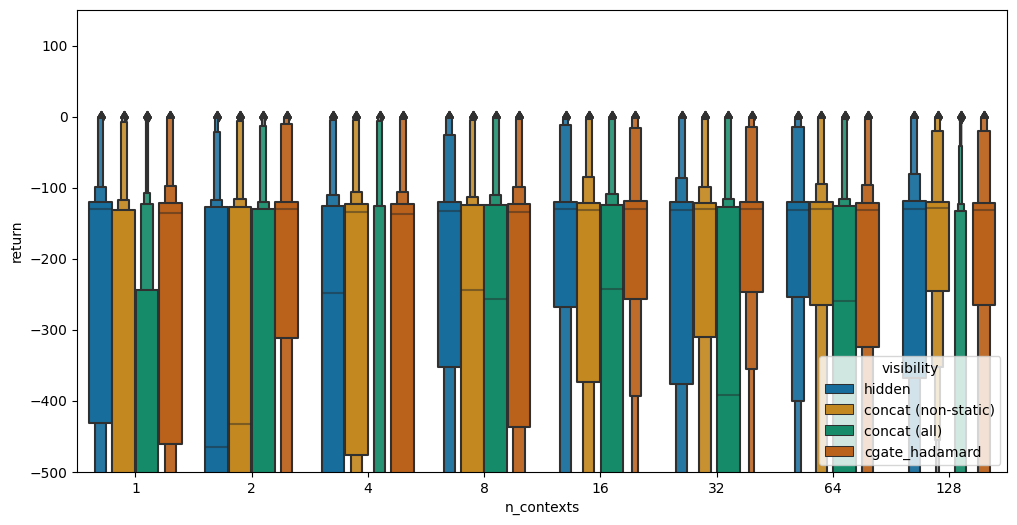

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
# ax = sns.violinplot(data=df, x="n_contexts", y="return", hue="visibility", cut=0, ax=ax)
# ax = sns.lineplot(data=df, x="n_contexts", y="return", hue="visibility", ax=ax)
ax = sns.boxenplot(data=df, x="n_contexts", y="return", hue="visibility", ax=ax)
ax.set_ylim(-500, ax.get_ylim()[1])
plt.show()